In [14]:
!ls

assets				layers		optimizers	 utils
binary_classification_model.py	losses		plot_history.py  xor_model.py
data				model.pkl	__pycache__
iris_dataset_model.py		neural_network	Untitled.ipynb


In [41]:
from data import create_xor_data
from neural_network import NeuralNetwork
from optimizers import AdamOptimizer
from layers import Dense, ActivationReLU, ActivationSigmoid, Dropout
from losses import BinaryCrossentropy
from utils import train_test_split

In [47]:
x, y = create_xor_data(1000)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [58]:
model = NeuralNetwork()

model.add_layer(Dense(x.shape[1], 4))
model.add_activation(ActivationReLU())

model.add_layer(Dense(4, 1))
model.add_activation(ActivationSigmoid())

optimizer = AdamOptimizer(learning_rate=0.01)
loss_func = BinaryCrossentropy()

model.compile(optimizer=optimizer, loss_function=loss_func)

In [59]:
history = model.fit(x_train, y_train, epochs=100, return_history=True)

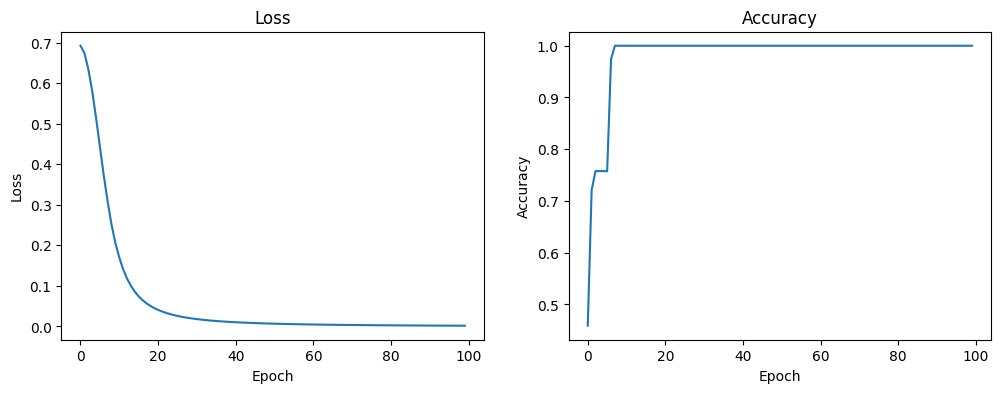

In [60]:
from plot_history import plot_history

plot_history(history)

In [61]:
loss, acc = model.evaluate(x_test, y_test)

print('Loss:', loss)
print('Accuracy:', acc)

Loss: 0.0018
Accuracy: 1.0


In [62]:
model.summary()

                                   Model Summary                                   
Layer      Type                 Input Size      Output Size     Activation          
Layer 1    Dense                2               4               ActivationReLU      
Layer 2    Dense                4               1               ActivationSigmoid   
Total layers: 2
Optimizer: AdamOptimizer
Loss Function: BinaryCrossentropy
Learning Rate Scheduler: None
Batch Size: 32
